# 데이터 정리하기

## 1. 5대 범죄 데이터 확인, 경찰서 위치 정보 저장

1. 다운받은 서울시 범죄현황 데이터를 불러와 확인
**Notice** 지도 데이터로 위치 정보 알기, pivot_table 등 응용을 위해서 2015년 데이터 활용(2019데이터는 이미 구별로 정보 나뉘어 있음)

In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv', thousands=',',encoding="euc-kr" )
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


2. Googl Maps Geocoding API로 관서별 경도,위도 정보 가져오기


다운받은 데이터가 관서별로 정리되어 있음 -> 구별로 정보를 확인하기 위해서 데이터 받아오기

In [3]:
import googlemaps

In [4]:
gmaps_key = "*****************"
gmaps = googlemaps.Client(key=gmaps_key)

In [5]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

+ data에 관서 이름이 '중부서'형식으로 되어있는걸 google maps의 양식('서울중부경찰서')으로 수정

In [6]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

+ 각 경찰서별 주소 얻기
  + 위도, 경도 데이터는 이후 지도 시각화에 필요하므로 미리 저장하기

In [7]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language="ko")
    station_address.append(tmp[0].get("formatted_address"))
    tmp_loc = tmp[0].get("geometry")
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    print(name+'-->'+tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 녹번동 진흥로 58
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내동 신내역로3길 40-10
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 테헤란로114길 11
서울관악경찰서-->대한민국 서울특별시 관악구 청룡동 관악로5길 33
서울강서경찰서-->대한민국 서울특별시 강서구 화곡동 화곡로 308
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락동

In [8]:
station_address

['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 회현동 한강대로 410',
 '대한민국 서울특별시 서대문구 충현동 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 백범로 329',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 마포대로 183',
 '대한민국 서울특별시 영등포구 영등포동1가 618-7',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진1동 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 녹번동 진흥로 58',
 '대한민국 서울특별시 강북구 번1동 오패산로 406',
 '대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 신내동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 테헤란로114길 11',
 '대한민국 서울특별시 관악구 청룡동 관악로5길 33',
 '대한민국 서울특별시 강서구 화곡동 화곡로 308',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 구로동 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락동 중대로 221',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배본동 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 

In [9]:
station_lat

[37.5636465,
 37.575548,
 37.5547584,
 37.5647439,
 37.5718529,
 37.5387099,
 37.58977830000001,
 37.58506149999999,
 37.550814,
 37.5153176,
 37.5617303,
 37.5130866,
 37.542873,
 37.6020914,
 37.63730390000001,
 37.4568722,
 37.6186095,
 37.5094352,
 37.4743945,
 37.5512463,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5167711,
 37.5016941,
 37.6425238,
 37.4945959,
 37.6280204,
 37.6533589,
 37.49349]

In [10]:
station_lng

[126.9895796,
 126.9847471,
 126.9734981,
 126.9667705,
 126.9989143,
 126.9659183,
 127.016589,
 127.0457679,
 126.954028,
 126.905728,
 127.0364217,
 126.9428498,
 127.083821,
 126.9213528,
 127.0273399,
 126.8970429,
 127.1045734,
 127.0669578,
 126.9513489,
 126.8499633,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656996,
 127.1272481,
 127.0717076,
 126.9831279,
 126.9287899,
 127.052682,
 127.0772119]

+ 관서명에서 각 구를 파악하고 컬럼 추가하기

In [11]:
gu_name = []
for name in station_address:
    tmp = name.split() #스페이스로 구분하여 두 번쨰 단어를 가르킴(구 명)
    tmp_gu = [gu for gu in tmp if gu[-1] == "구"][0]
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


+ 금천서는 관악구에 있으므로 '구별'명을 금천구로 변경

In [13]:
crime_anal_police.loc[crime_anal_police['관서명']=='금천서', ['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


+ 구 이름을 포함한 data를 csv파일로 저장(저장 안 하면 실행마다 처음부터 데이터 받아와야함)

In [14]:
crime_anal_police.to_csv('data/02. crime_in_Seoul_include_gu_name.csv', sep=',', encoding="utf-8")

In [15]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


## 2. 범죄 데이터를 구별로 정리하기 with Pivot Table

In [16]:
import pandas as pd
import numpy as np

In [17]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


+ pivot_table로 관서별 데이터를 구별로 바꾸기
  + aggfunc=np.sum 을 통해 구별 데이터의 총합을 구하기

In [18]:
crime_anal = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8', index_col=0)
crime_anal = pd.pivot_table(crime_anal_raw, index="구별", aggfunc=np.sum)
crime_anal.head()

,Unnamed: 0,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,,
강남구,47,349,449,18,21,10,13,1650,3850,3705,4284
강동구,20,123,156,8,6,3,4,789,2366,2248,2712
강북구,14,126,153,13,14,8,7,618,1434,2348,2649
강서구,19,191,262,13,13,8,7,1260,2096,2718,3207
관악구,18,221,320,14,12,8,9,827,2706,2642,3298


+ 검거율을 계산하고, 검거 건수는 지우기

In [21]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,Unnamed: 0,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,19,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,18,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


+ 전년도 검거 건수 영향으로 검거율이 100%넘는 경우, 100으로 통일해줌

        .loc[인덱스, 컬럼]

In [23]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] >= 100, column] = 100
    
crime_anal.head()

,Unnamed: 0,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,19,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,18,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


+ 컬럼명에서 '발생' 지우기
        rename함수
        기존 df에 값을 덮어쓰려면 inplace=True 옵션 넣기

In [22]:
crime_anal.rename(columns= {'강간 발생':'강간',
                            '강도 발생':'강도',
                            '살인 발생':'살인',
                            '절도 발생':'절도',
                            '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,Unnamed: 0,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,
강남구,47,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,20,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,14,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,19,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,18,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


## 3. 데이터 표현 위해 다듬기

+ sklearn패키지의 preprocessing 기능을 사용해서 값의 자릿수 맞추기
  + 각 항목의 최댓값을 1로 두고 비율에 따라 소숫점아래 6자리 수로 정규화->이후 비교 수월 목적

In [24]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


+ CCTV_result.csv파일을 불러와서 구별 인구수 받아오기
  + CCTV데이터에 포함된 구별 인구수 데이터 활용

In [28]:
result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding='utf-8', index_col='구별')
crime_anal_norm[['인구수']] = result_CCTV[['인구수']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


+ 구별 범죄 발생 건수의 합, 검거율의 합 구하기


+ np.sum의          
  + axis=1은 y축 기준의 합계를 의미한다
  + axis=0은 x축 기준의 합계를 의미한다
  + axis=None은 대상 데이터의 모든 요소의 합계를 의미한다

In [29]:
col1 = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col1], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [30]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


## 4. seaborn으로 데이터 시각화하기

**seaborn**
matplotlib기반으로 동작하는 시각화 라이브러리 
pairplot과 같은 탐색적 분석을 위한 기능을 제공함

+ matplotlib가 한글 폰트를 제공하지 않으므로 이를 해결하는 코드 필요

In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install platform

ERROR: Could not find a version that satisfies the requirement platform (from versions: none)
ERROR: No matching distribution found for platform
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [38]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.204979,416.915211
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.603930,325.647079
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.666924,423.928929
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.905445,383.477292


+ **sns.pairplot**메소드로 '강도','살인','폭력' 데이터의 관계 확인하기
  + crime_anal_norm 데이터프레임 객체를 넘겨 그래프로 그리고 싶은 데이터 정하기
  + 'vars'파라미터에 그리고 싶은 데이터 칼럼 이름 넘기기
  + 'kind'파라미터를 통해 그래프 종류 선택하기. 'scatter','kde','hair','reg'네 종류 지원
  + 'hue'파라미터에 칼럼 이름 넘겨서 그 칼럼의 데이터를 기준으로 그래프의 색을 다르게 보여줌
    + (hue 피라미터를 사용하지 않았지만 범주형 데이터가 포함된 시각화에서 유용하게 사용가능)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


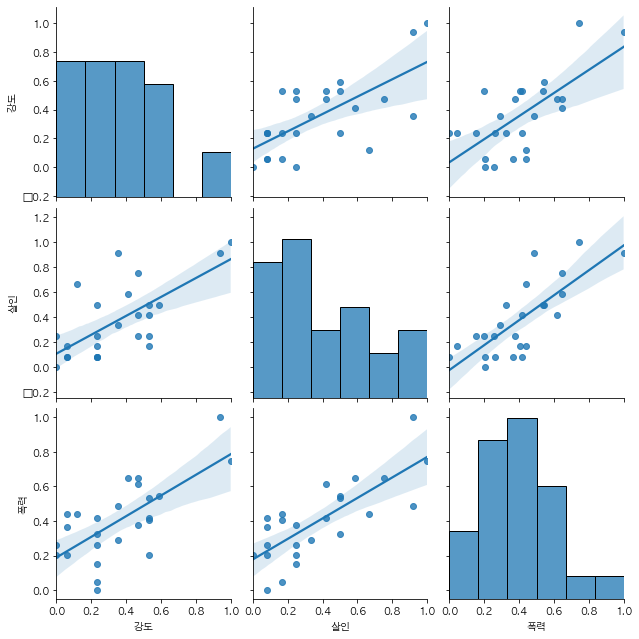

In [39]:
sns.pairplot(crime_anal_norm, vars=['강도','살인','폭력'],kind='reg', size=3)
plt.show()

+ 검거율 비교하기
 + '검거'칼럼 값(검거율의 함)을 최대값으로 나누어 정규화해주기
 + 정규화한 '검거'칼럼 값을 기준으로 정렬하기

In [40]:
crime_anal_norm['검거']=crime_anal_norm['검거']/crime_anal_norm['검거'].max()
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,1.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,0.979971
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,0.965728
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,0.963758
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,0.954443


+ **Seaborn라이브러리 heatmap메서드로 시각화**


**(1)검거율 시각화**
+ crime_anal_norm_sort[cols]를 넘긴-> 히트맵으로 시각화하려는 데이터프레임 정하기
+ annot파라미터를 True로 설정-> 범죄 검거 비율 값을 히트맵의 각 셀 위에 주석으로 달아준다

시각화 결과
  + 범죄 검거율 Best3 : 도봉구, 금천구, 강서구
  + 범죄 검거율 Worst3 : 중구, 동작구, 구로구

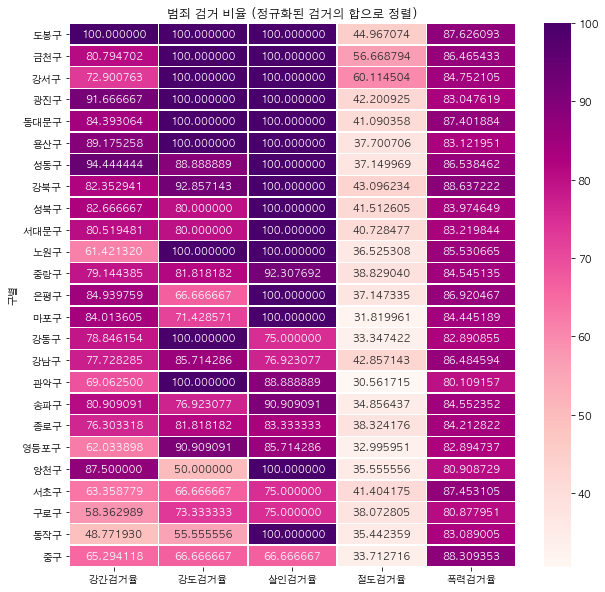

In [41]:
cols = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[cols], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

**(2)범죄 발생량 시각화**
+ 보기에 편하게 만들기 위해서 범죄 칼럼 값을 5로 나눔 -> 0~1 사이 값을 갖게 하기

시각화 결과 
+ 범죄 발생 빈도 Top3: 강남구, 영등포구, 송파구
+ 범죄 발생 빈도 Bottom3: 도봉구, 서대문구, 금천구

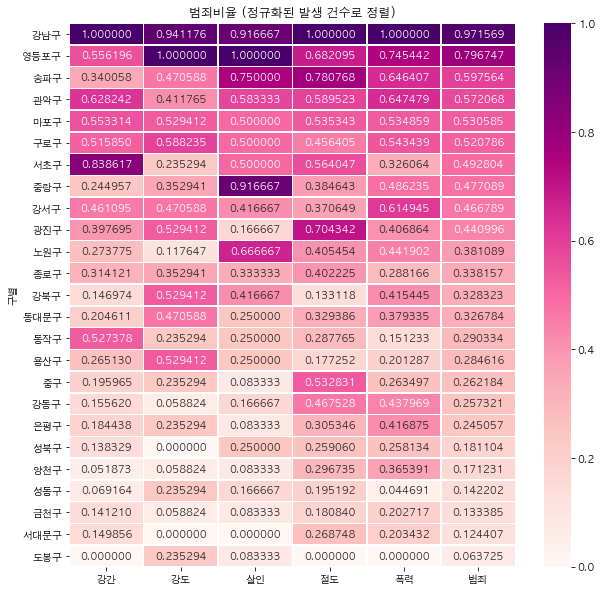

In [42]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [43]:
crime_anal_norm.to_csv('data/02. crime_in_Seoul_final.csv', sep=',', 
                       encoding='utf-8')

### Folium으로 지도 시각화하기

In [47]:
pip install folium

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:
import folium

+ **경찰서별 검거현황과 구별 범죄발생 현황 시각화**
  + 미리 저장해 놓은 구별 경찰서의 위치 정보 사용하기

In [48]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()


,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


( 서울 지도 데이터 불러오기. 출처: https://pinkwink.kr/971)

In [49]:
import json
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [50]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [51]:
map.save('crime_total.html')

+ 각 경찰서의 위치를 지도로 시각화하기

In [52]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], 
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

In [53]:
map.save('police.html')

+ 

In [54]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [57]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [56]:
final_map.save('final.html')

## 데이터로 워드클라우드 구현하기

(데이터가 숫자로 표현되어 있어서 빈도를 워드 클라우드로 구현하는 것 불가능. 가능한 방법 모색중)

In [93]:
pip install wordcloud

     |████████████████████████████████| 220 kB 1.1 MB/s eta 0:00:01
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done
Note: you may need to restart the kernel to use updated packages.


In [99]:
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [186]:
f = open("/Users/hyunjinlee/Downloads/report.txt")
line = f.readline()
print(line)
f.close()

기간	자치구	합계	합계	살인	살인	강도	강도	강간강제추행	



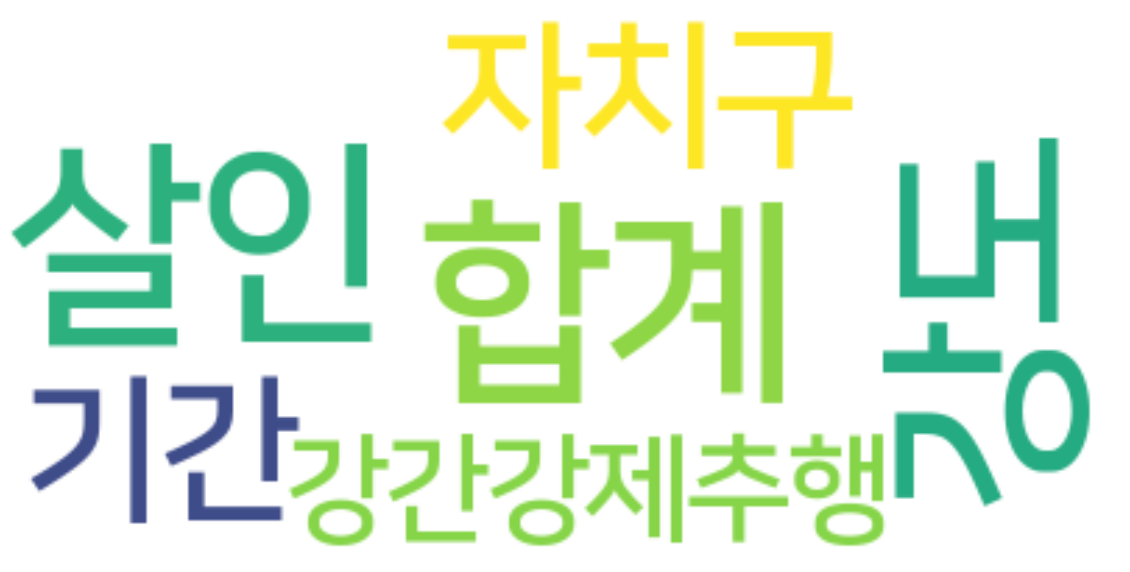

In [187]:
## LOAD TEXTS
text = line

## CREATE WORDCLOUD
wc = WordCloud(
    font_path='/Users/hyunjinlee/Library/Fonts/NanumSquare_acB.ttf',
    background_color='white'
)
wc.generate(text)

# SHOW WORDCLOUD
plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()